In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data= pd.read_excel(r"C:\Users\saikr\Documents\Data_Train.xlsx")

In [4]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [9]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
data=train_data.copy()

In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [21]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [22]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [23]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-08 05:50:00,2024-10-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [24]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)
    

In [25]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [26]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-08 05:50:00,2024-10-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [27]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-08 05:50:00,2024-10-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
cols_to_drop = ["Arrival_Time","Dep_Time"]
data.drop(cols_to_drop , axis =1 ,inplace = True)

In [29]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [30]:
data.shape

(10682, 16)

In [31]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return "Noon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "late Night"

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
late Night       1040
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

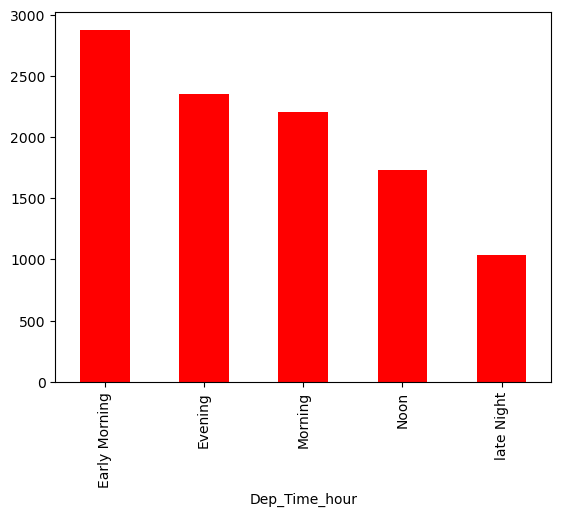

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="red")

In [34]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks


In [35]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

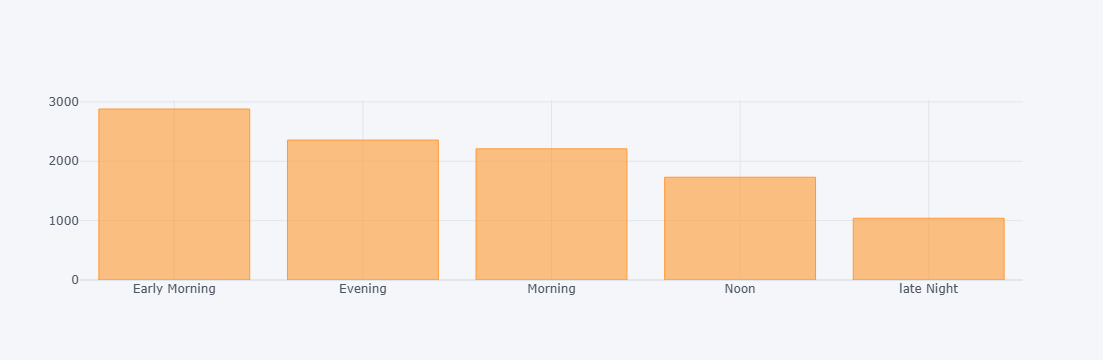

In [36]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [37]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [38]:
def process_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x =  x + ' ' + '0m'
    return x    

In [39]:
data['Duration'] = data['Duration'].apply(process_duration)

In [40]:
data['Duration'] 

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [41]:

data['Duration'][0]





'2h 50m'

In [42]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [43]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [44]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [45]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [46]:
data['Duration_hours'] =data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [47]:
data['Duration_minutes'] =data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [49]:
eval('2*60')

120

In [50]:
data['Duration_total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m' , "*1").apply(eval)

In [51]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [52]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

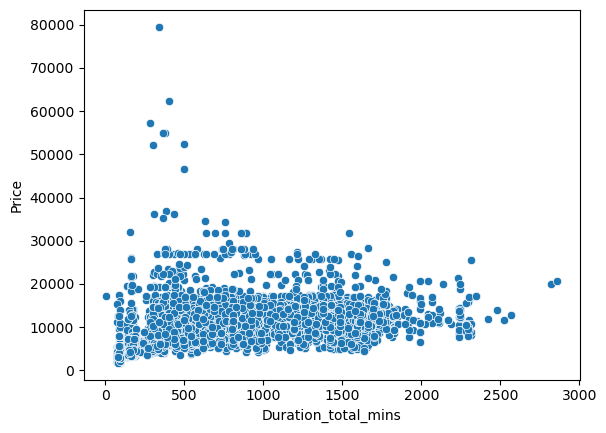

In [53]:
sns.scatterplot(x='Duration_total_mins',y="Price",data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

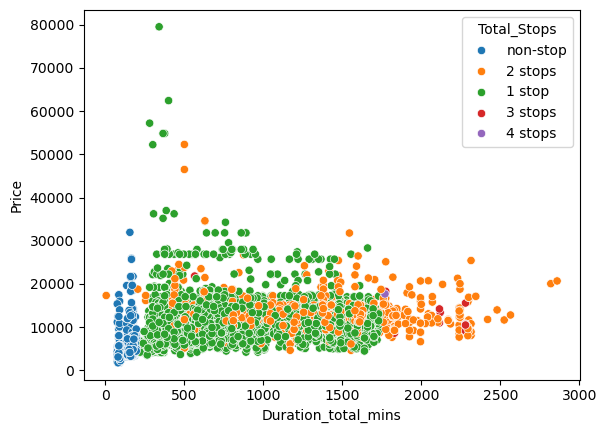

In [54]:
sns.scatterplot(x='Duration_total_mins',y="Price",hue="Total_Stops",data=data)

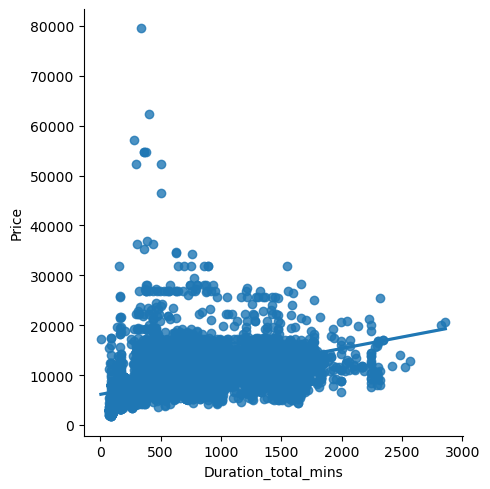

In [55]:
sns.lmplot(x='Duration_total_mins',y="Price",data=data)

In [56]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [57]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

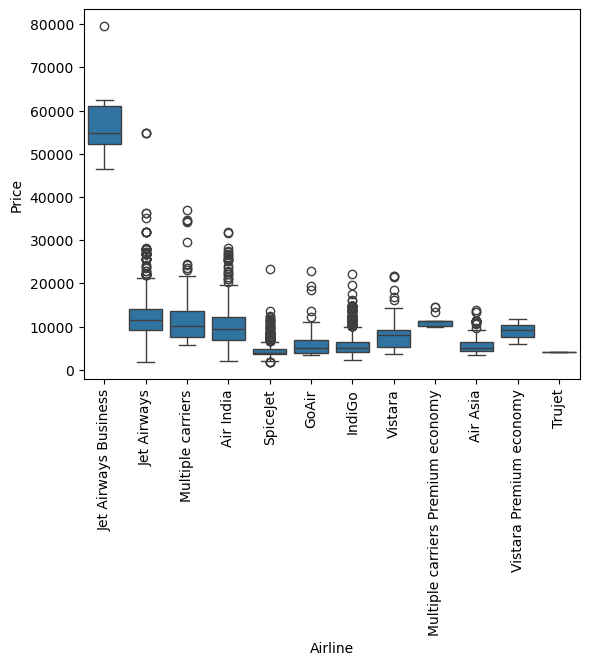

In [58]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical")

In [59]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [60]:
catogerical_col = [col for col in data.columns if data[col].dtype=="object"]

In [61]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [62]:
catogerical_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [63]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [64]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [65]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [66]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [67]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [68]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [69]:
dict_airlines = {key:index for index , key in enumerate(airlines,0)}

In [70]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [71]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [72]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [73]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [74]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [75]:
data['Destination'].replace('New Delhi' , 'Delhi' ,inplace=True)

In [76]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [77]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [78]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [79]:
dict_dest = {key:index for index , key in enumerate(dest,0)}

In [80]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [81]:
data['Destination'] = data['Destination'].map(dict_dest)

In [82]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [83]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [84]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [85]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [86]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [87]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [88]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [89]:
data['Additional_Info'].value_counts()/len(data)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [90]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [91]:
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', 'Source', 'Journey_year','Route'], axis=1 ,inplace=True)
 

In [92]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [93]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [94]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [95]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [96]:
def plot(df,col):
    fig , (ax1 , ax2 ,ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] ,ax=ax2)
    sns.distplot(df[col],ax=ax3 ,kde=False)

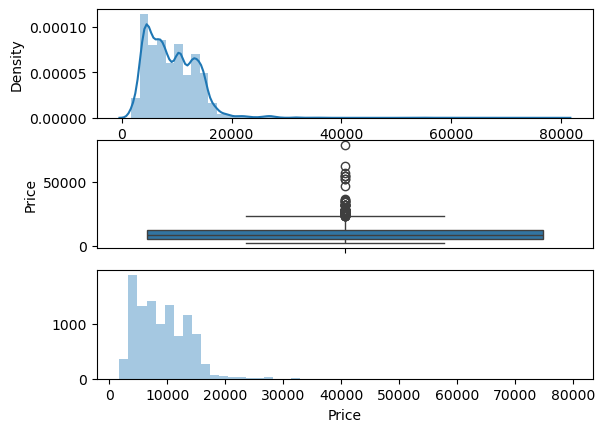

In [97]:
plot(data, 'Price')

In [98]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr


In [99]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [100]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [101]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

In [102]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

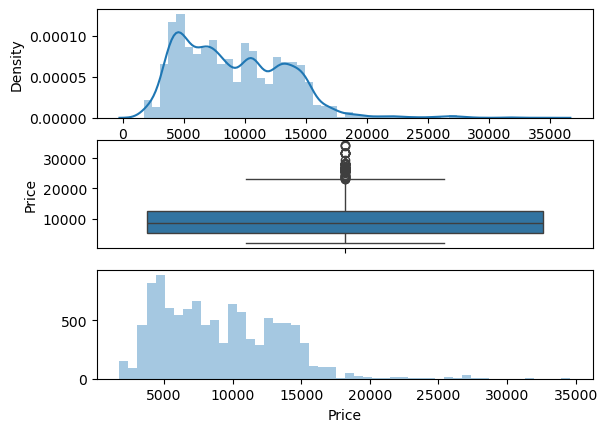

In [103]:
plot(data,'Price')

In [104]:
y = data['Price']


In [105]:
X=data.drop(['Price'],axis=1)

In [106]:
from sklearn.feature_selection import mutual_info_regression

In [107]:
imp = mutual_info_regression(X,y)

In [108]:
imp

array([1.3154104 , 1.06624109, 0.78545631, 0.36618434, 0.62156247,
       0.91495015, 0.75865536, 1.14940612, 0.89257138, 1.12924876,
       0.67599081, 0.38762732, 0.45973238, 0.51936978, 0.13111556,
       0.19744457])

In [109]:
pd.DataFrame(imp)

,0
0,1.315410
1,1.066241
2,0.785456
3,0.366184
4,0.621562
5,0.914950
6,0.758655
7,1.149406
8,0.892571
9,1.129249


In [110]:
pd.DataFrame(imp, index=X.columns)

,0
Airline,1.315410
Destination,1.066241
Total_Stops,0.785456
Journey_day,0.366184
Journey_month,0.621562
Dep_Time_hour,0.914950
Dep_Time_minute,0.758655
Arrival_Time_hour,1.149406
Arrival_Time_minute,0.892571
Duration_hours,1.129249


In [111]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [112]:
imp_df.columns = ['Importance']

In [113]:
imp_df

,Importance
Airline,1.315410
Destination,1.066241
Total_Stops,0.785456
Journey_day,0.366184
Journey_month,0.621562
Dep_Time_hour,0.914950
Dep_Time_minute,0.758655
Arrival_Time_hour,1.149406
Arrival_Time_minute,0.892571
Duration_hours,1.129249


In [114]:
imp_df.sort_values(by='Importance' , ascending=False)

,Importance
Airline,1.315410
Arrival_Time_hour,1.149406
Duration_hours,1.129249
Destination,1.066241
Dep_Time_hour,0.914950
Arrival_Time_minute,0.892571
Total_Stops,0.785456
Dep_Time_minute,0.758655
Duration_minutes,0.675991
Journey_month,0.621562


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
ml_model = RandomForestRegressor()

In [119]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [120]:
y_pred = ml_model.predict(X_test)

In [121]:
y_pred

array([16744.87      ,  5432.22      ,  8896.82      , ...,
        7951.85      ,  8974.19      , 12218.25309524])

In [122]:
from sklearn import metrics

In [123]:
metrics.r2_score(y_test , y_pred)

0.817192354948449

In [124]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [125]:
import pickle

In [126]:
file = open(r"C:\Users\saikr\Documents\flight/rf_random.pkl",'wb')

In [127]:
pickle.dump(ml_model,file)

In [128]:
model = open(r"C:\Users\saikr\Documents\flight/rf_random.pkl",'rb')

In [129]:
forest = pickle.load(model)

In [130]:
forest.predict(X_test)

array([16744.87      ,  5432.22      ,  8896.82      , ...,
        7951.85      ,  8974.19      , 12218.25309524])

In [131]:
ypred2 = forest.predict(X_test)

In [132]:
metrics.r2_score(y_test , ypred2)

0.817192354948449

In [133]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [134]:
mape(y_test , y_pred)

13.19929279013936

In [135]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print(' r2 score : {}'.format(r2_score))
    print(' MAE : {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print(' MSE : {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print(' RMAE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print(' MAPE : {}'.format(mape(y_test,y_prediction)))
    sns.displot(y_test - y_prediction)
         

Training score : 0.9542554895838784
predictions are : [16755.86        5183.25        8857.1        ...  8493.27
  9098.3        11946.00552381]


 r2 score : 0.8176237830957618
 MAE : 1163.2310445627984
 MSE : 3502301.85216695
 RMAE : 1871.4437881397746
 MAPE : 13.093781275319946


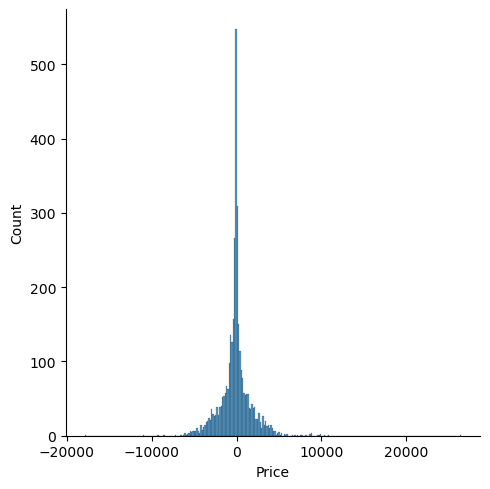

In [136]:
predict(RandomForestRegressor())

In [137]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9696998040730191
predictions are : [16840.   4959.   8085.  ...  6755.  10208.  11652.5]


 r2 score : 0.6953450864939588
 MAE : 1386.581612781244
 MSE : 5850507.735908489
 RMAE : 2418.782283693282
 MAPE : 15.410192799306715


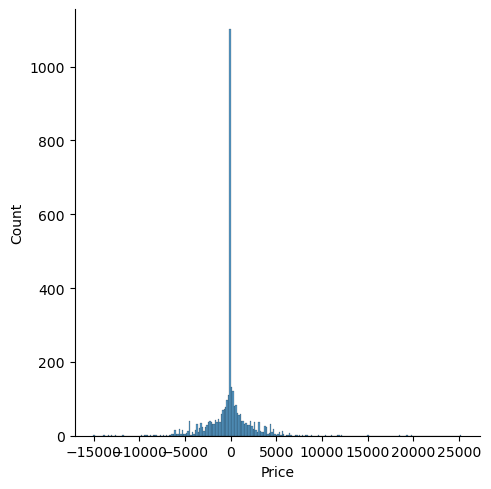

In [138]:
predict(DecisionTreeRegressor())

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
reg_rf = RandomForestRegressor()

In [141]:
np.linspace(start = 100, stop = 1200 , num= 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [142]:
n_estimators = [int(x) for x in np.linspace(start =100, stop =1200 , num=6)]

max_features = ["auto" , "sqrt"]

max_depth = [int(x) for x in np.linspace(start =5, stop =30 , num=4)]

min_samples_split = [5,10,15,100]

                

In [143]:
random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth'   : max_depth,
    'min_samples_split' : min_samples_split
}

In [144]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [145]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 ,verbose=2)

In [146]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [147]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [297]:
rf_random.best_score_

0.7995165270588857